**Loading IMDB Dataset**

In [1]:
from keras.datasets import imdb

In [2]:
#Load most frequently occuring word, i.e.only 10000 words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
print(type([max(sequence) for sequence in train_data]))
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

**Preparing the Dataset**

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [5]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
X_train.shape

(25000, 10000)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

**Building the Neural Network**

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**Compiling the Model**

In [16]:
from tensorflow.keras import optimizers
from keras import losses
from keras.metrics import *

model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
     

**Setting up Validation**

In [17]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training our Model**

In [18]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 29s 144ms/step - loss: 0.6537 - accuracy: 0.6584 - val_loss: 0.4820 - val_accuracy: 0.8483
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4152 - accuracy: 0.8800 - val_loss: 0.3418 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2706 - accuracy: 0.9193 - val_loss: 0.2974 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1987 - accuracy: 0.9390 - val_loss: 0.2780 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1532 - accuracy: 0.9552 - val_loss: 0.2796 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1178 - accuracy: 0.9684 - val_loss: 0.2902 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0971 - accuracy: 0.9750 - val_loss: 0.3057 - val_accuracy: 0.8830
Epoch 8/20


In [19]:
history_dict = history.history
history_dict.keys()
# history_dict contain 'loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

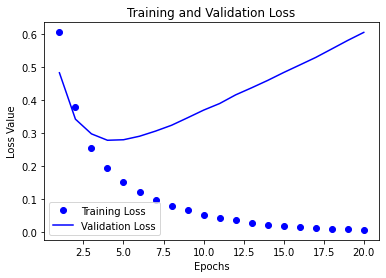

In [21]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

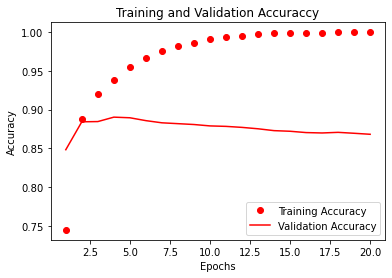

In [24]:
# Training and Validation Accuracy

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Retraining our Model**

In [25]:
model.fit(partial_X_train,
          partial_y_train,
                   epochs=3,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/3
30/30 [==============================] - 4s 126ms/step - loss: 0.0057 - accuracy: 0.9998 - val_loss: 0.6320 - val_accuracy: 0.8681
Epoch 2/3
30/30 [==============================] - 1s 24ms/step - loss: 0.0047 - accuracy: 0.9998 - val_loss: 0.6562 - val_accuracy: 0.8680
Epoch 3/3
30/30 [==============================] - 1s 17ms/step - loss: 0.0038 - accuracy: 0.9999 - val_loss: 0.6811 - val_accuracy: 0.8672


In [26]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)
result

array([[0.00717673],
       [1.        ],
       [0.9815633 ],
       ...,
       [0.00277752],
       [0.00658557],
       [0.9445588 ]], dtype=float32)

In [27]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    if score > 0.5 :
       y_pred[i] = 1 
    else : 
       0

In [28]:
print("Array of positive and Negative Review : ")
print("Positive Review = 1 \nNegative Review = 0 \n",y_pred)

Array of positive and Negative Review : 
Positive Review = 1 
Negative Review = 0 
 [0. 1. 1. ... 0. 0. 1.]


In [29]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error = ", MAE)

Mean Absolute Error =  0.14372


In [30]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score = ",Accuracy)


Accuracy score =  0.85628
